In [5]:
import numpy as np
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

init_notebook_mode(connected=True)

## Introduction

This notebook presents a condensed version of the Easy Writer's pencil production problem and is intended to act as a companion to the primal simplex method discussion.  The inventory constraints of the original Easy Writer's problem to reduce the number of constraints being considered.

## Input Data

Unit department loads and capacities are provided in the table below.

|Department|Economy Writer (sec)|Deluxe Writer (sec)|Capacity (hrs)|Capacity (sec)|
|--|:--:|:--:|:--:|:--:|
|Preprocessing|2.0|2.0|12.0|43,200|
|Curing|3.5|3.5|8.25|29,700|
|Shaping|1.25|8.75|13.0|46,800|
|Assembly|8.0|10.0|18.0|64,800|

Assume profit contribution of \\$0.39 and $0.76 for the Economy Writer and Deluxe Writer pencils, respectively.


## Model Definition

- Decision variables shall represent the quantity of each product to produce.  Let the quantity of Economy Writer pencils and the quantity of Deluxe Writer pencil be $x_e$ and $x_d$, respectively.
- The objective function should maximize the total profit contribution.
- Constraints will be needed to acknowledge the limited number of labor hours in each department.

Linear programming model is shown below.

$$ \text{max } 0.39x_e + 0.76x_d$$
$$ \text{s.t.} $$
$\text{The following 4 constraints represent labor consumption in each department.  Time units are in seconds.}$
$$ 2x_e + 2x_d \le 43,200 $$
$$ 3.5x_e + 3.5x_d \le 29,700 $$
$$ 1.25x_e + 8.75x_d \le 46,800 $$
$$ 8x_e + 10x_d \le 64,800 $$
$\text{Nonnegativity constraints on decision variables.}$
$$x_d, x_e \ge 0 $$

## Graphical Solution

The LP model described below contains only 2 decision variables. Hence, a graphical approach can also be implemented to achieve the optimal solution.

### Feasible Region Definition

In [8]:
def preprocess_trace():
    x_e = np.arange(0,43200/2, 10)
    x_d = (1/2)*(43200 - 2*x_e)
    return go.Scatter(
        x=x_e,
        y=x_d,
        name='Preprocessing Dept.',
        fill='tozeroy'
    )

def curing_trace():
    x_e = np.arange(0, 29700/3.5, 10)
    x_d = (1/3.5)*(29700-3.5*x_e)
    return go.Scatter(
        x=x_e,
        y=x_d,
        name='Curing Dept.',
        fill='tozeroy'
    )

def shaping_trace():
    x_e = np.arange(0, 46800/1.25, 10)
    x_d = (1/8.75)*(46800 - 1.25*x_e)
    return go.Scatter(
        x=x_e, 
        y=x_d,
        name='Shaping Dept.', 
        fill='tozeroy'
    )

def asbly_trace():
    x_e = np.arange(0, 64800/8, 10)
    x_d = (1/10)*(64800 - 8*x_e)
    return go.Scatter(
        x=x_e,
        y=x_d,
        name='Assembly Dept.',
        fill='tozeroy'
    )

constraint_traces = [preprocess_trace(), curing_trace(), shaping_trace(), asbly_trace()]

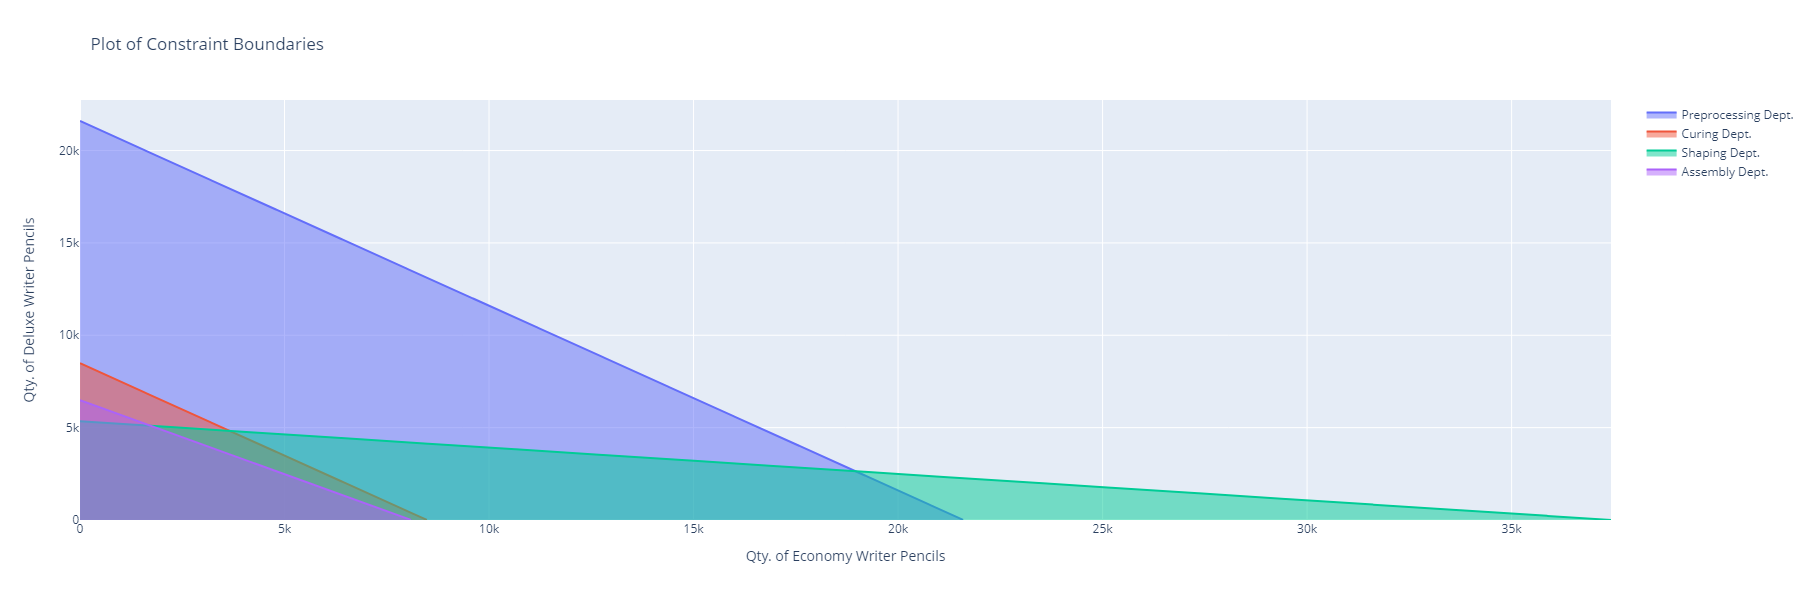

In [18]:
layout = {'height': 600, 
         'xaxis': {'title': 'Qty. of Economy Writer Pencils'},
         'yaxis': {'title': 'Qty. of Deluxe Writer Pencils'},
          'title': {'text': 'Plot of Constraint Boundaries'}
         }
fig = go.Figure(data=constraint_traces, layout=layout)
iplot(fig)

The graphical method requires that the common intersection of all constraint regions must be identified.  This common region contains the set of feasible points which satisfies all the constraints.  In this problem boundaries formed by the shaping and assembly departments form the feasible region.

In [19]:
a = np.array([[1.25, 8.75], [8, 10]])
b = np.array([46800, 64800])
shaping_asbly_intercept = np.linalg.solve(a,b)
print(f"Intersection of shaping and assembly department constraints: ({shaping_asbly_intercept[0]:,.1f}, {shaping_asbly_intercept[1]:,.1f})")

Intersection of shaping and assembly department constraints: (1,721.7, 5,102.6)


In [20]:
shaping_deluxe_intercept = 46800/8.75
asbly_economy_intercept = 64800/8

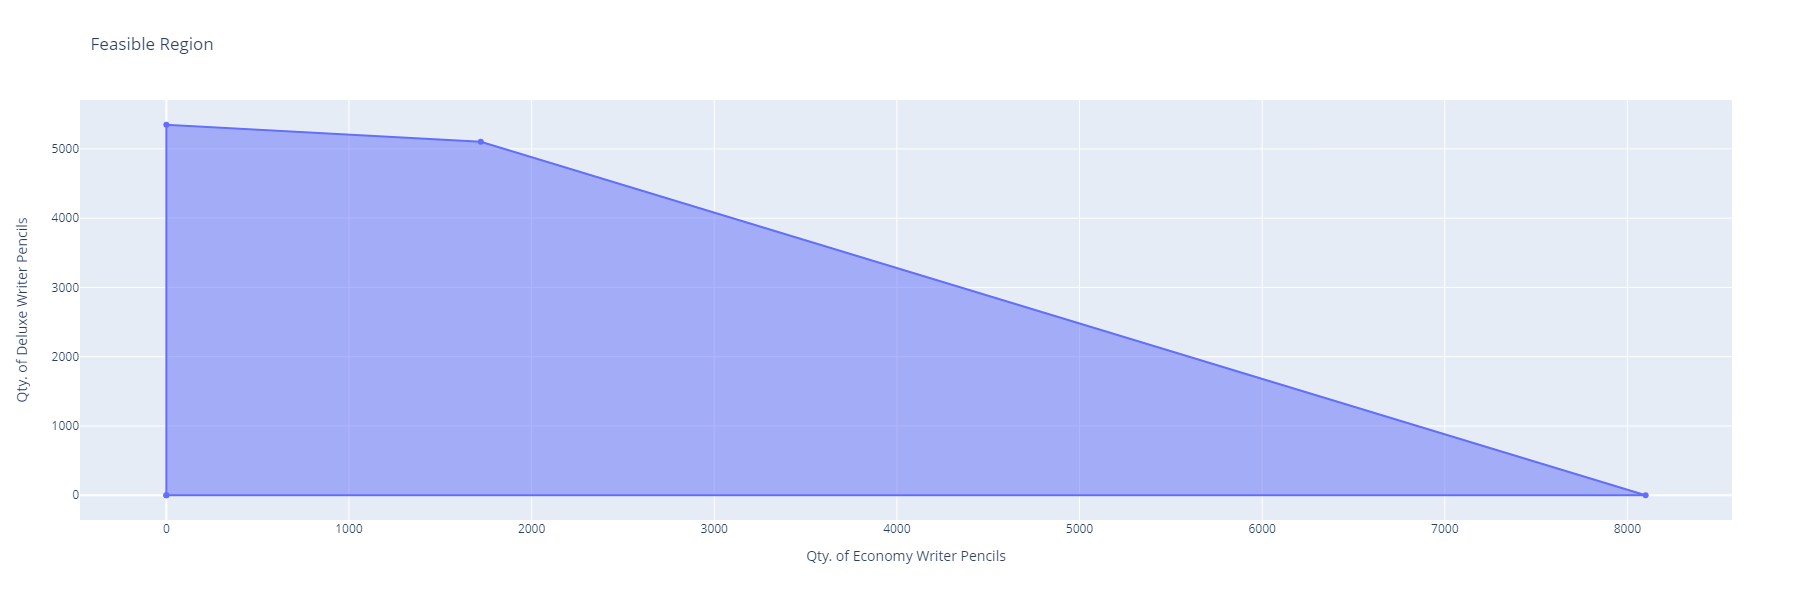

In [21]:
feasible_region = go.Scatter(
    x = [0,0,shaping_asbly_intercept[0], asbly_economy_intercept, 0],
    y = [0,shaping_deluxe_intercept,shaping_asbly_intercept[1], 0, 0],
    fill = 'toself',
    name ='Feasible Region'
)

layout['title']['text'] = 'Feasible Region'

fig = go.Figure(data=[feasible_region], layout=layout)
iplot(fig)

### Optimal Solution Investigation

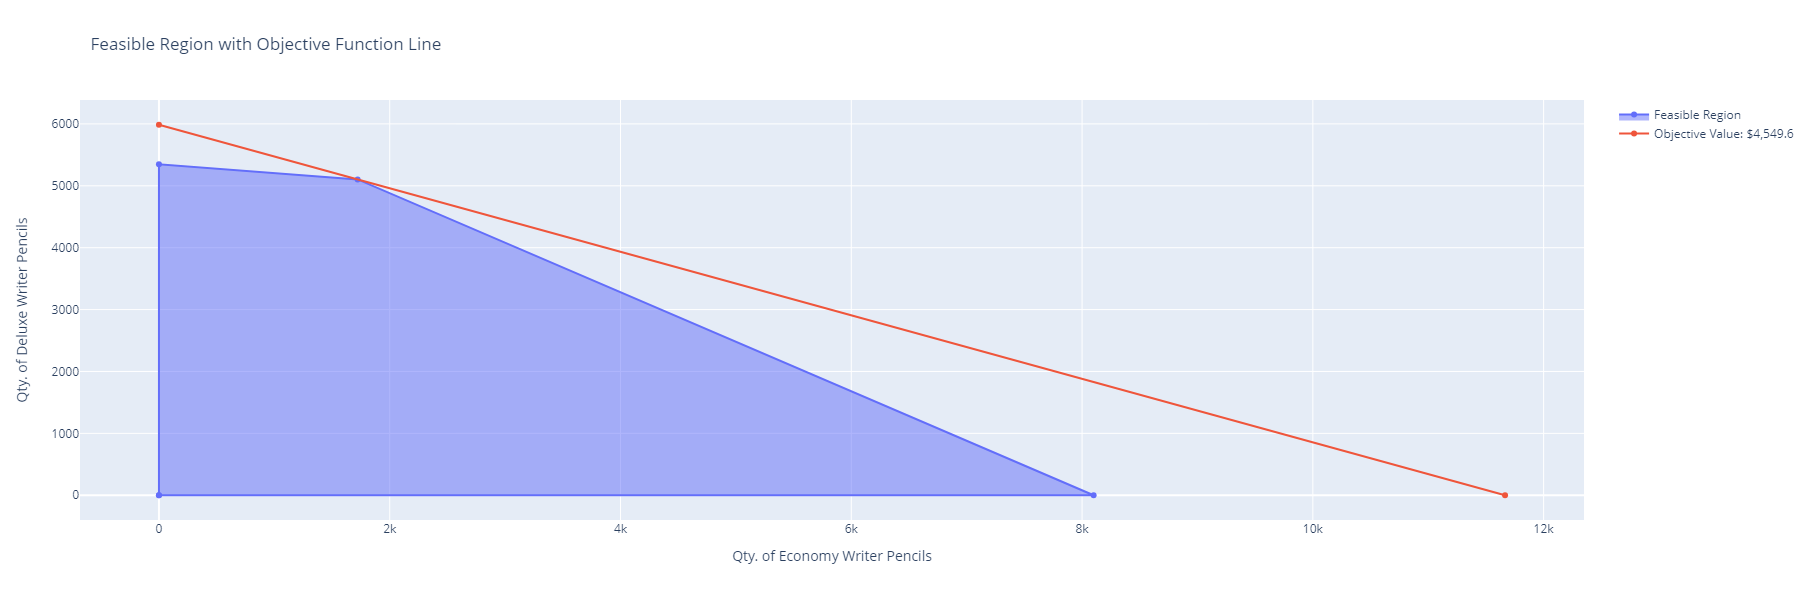

In [22]:
obj_traces = []
profit_contrib = {'Economy': 0.39, 'Deluxe': 0.76}

for i in [4549.6]:
    obj_traces.append(go.Scatter(
        x = [0, i/profit_contrib['Economy']],
        y = [i/profit_contrib['Deluxe'], 0],
        name = f'Objective Value: ${i:,}'
    ))
    
layout['title']['text'] = 'Feasible Region with Objective Function Line'
fig = go.Figure(data=[feasible_region]+obj_traces, layout=layout)
iplot(fig)

Inspecting the above figure reveals that the optimal solution will be at the intersection of the boundaries formed by the shaping and assembly departments.  This results in an objective value of slightly more than $5,000.  A more exact statement of the optimal solution is provided below.

In [23]:
print(f"**Optimal Solution**")
print(f"Quantity of Economy Writer Pencils: {shaping_asbly_intercept[0]:,.1f}")
print(f"Quantity of Deluxe Writer Pencils: {shaping_asbly_intercept[1]:,.1f}")
print(f"Profit Contribution: ${shaping_asbly_intercept[0]*profit_contrib['Economy'] + shaping_asbly_intercept[1]*profit_contrib['Deluxe']:,.2f}")

**Optimal Solution**
Quantity of Economy Writer Pencils: 1,721.7
Quantity of Deluxe Writer Pencils: 5,102.6
Profit Contribution: $4,549.46
